# Linear Regression Assignment

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# import pandas
# import numpy
# import matplotlib
# import sklearn
# import statsmodels
# import seaborn
# import scipy
# import jupyter
# import sys
# 
# print('Python: {}'.format(sys.version))
# print('pandas: {}'.format(pandas.__version__))
# print('numpy: {}'.format(numpy.__version__))
# print('Matplotlib: {}'.format(matplotlib.__version__))
# print('sklearn: {}'.format(sklearn.__version__))
# print('statsmodels: {}'.format(statsmodels.__version__))
# print('seaborn: {}'.format(seaborn.__version__))
# print('scipy: {}'.format(scipy.__version__))

# Python: 3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]
# pandas: 2.0.3
# numpy: 1.24.3
# Matplotlib: 3.7.2
# sklearn: 1.3.0
# statsmodels: 0.14.0
# seaborn: 0.12.2
# scipy: 1.10.1

#### Data Understanding and Data Loading

In [3]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Pre-Processing Steps
* missing values
* outliers
* drop two columns -> registered and casual
* instant - drop as its just used to store record index
* dteday - convert to datetime with the format 15-01-2018
* season - convert to categorical. convert values to string and then categorical [(1:spring, 2:summer, 3:fall, 4:winter)]
* yr - convert to integer - (0: 2018, 1:2019)
* mnth - already in integer
* create dummy variable for all categorical variables where no of categories > 2

In [5]:
# missing values in columns
df_na_columns = df.isna().sum()[df.isna().sum() > 0] / len(df) * 100
df_na_columns.sort_values(ascending=False, inplace=True)
df_na_columns.__sizeof__()

0

In [6]:
# drop two columns -> registered and casual
df.drop(columns=['registered', 'casual'], inplace=True)

In [7]:
# instant - drop as its just used to store record index
df.drop(columns=['instant'], inplace=True)

In [8]:
# outliers

# Analyze the numerical columns for outliers
for col in df.select_dtypes(include=[np.number]).columns.tolist():
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Column: {col} => Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of Outliers in {col}: {outliers.shape[0]}")

# Analyze the categorical columns for outliers
for col in df.select_dtypes(include=[object]).columns.tolist():
    print(f"Column: {col}")
    print(df[col].value_counts())

Column: season => Lower Bound: 0.5, Upper Bound: 4.5
Number of Outliers in season: 0
Column: yr => Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers in yr: 0
Column: mnth => Lower Bound: -5.0, Upper Bound: 19.0
Number of Outliers in mnth: 0
Column: holiday => Lower Bound: 0.0, Upper Bound: 0.0
Number of Outliers in holiday: 21
Column: weekday => Lower Bound: -5.0, Upper Bound: 11.0
Number of Outliers in weekday: 0
Column: workingday => Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers in workingday: 0
Column: weathersit => Lower Bound: -0.5, Upper Bound: 3.5
Number of Outliers in weathersit: 0
Column: temp => Lower Bound: -5.7912089999999985, Upper Bound: 46.483709
Number of Outliers in temp: 0
Column: atemp => Lower Bound: -3.444381249999992, Upper Bound: 50.77986874999999
Number of Outliers in atemp: 0
Column: hum => Lower Bound: 20.515637499999997, Upper Bound: 104.4739375
Number of Outliers in hum: 2
Column: windspeed => Lower Bound: -0.8342588749999997, Upper Bound: 25.5

#### Outliers
1. We will not delete the outliers are there are not many and will go ahead

In [9]:
# dteday - convert to datetime with the format 15-01-2018
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [10]:
# season - convert to categorical. convert values to string and then categorical [(1:spring, 2:summer, 3:fall, 4:winter)]
df['season'] = df['season'].replace({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})
df['season'] = df['season'].astype('category')
df['season'].value_counts()


season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
# weathersit - convert to categorical. convert values to string and then categorical [(1:spring, 2:summer, 3:fall, 4:winter)]
df['weathersit'] = df['weathersit'].replace({
    1: 'Clear',
    2: 'Mist',
    3: 'LightSnow',
    4: 'HeavyRain'
})
# 1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
# 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
# 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
# 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
df['weathersit'] = df['weathersit'].astype('category')
df['weathersit'].value_counts()


weathersit
Clear        463
Mist         246
LightSnow     21
Name: count, dtype: int64

In [12]:
# yr - convert to integer - (0: 2018, 1:2019)
df['yr'] = df['yr'].replace({
    0: 2018,
    1: 2019
})
df['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [13]:
df.nunique().sort_values(ascending=True)

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dteday        730
dtype: int64

#### EDA :-
* Univariate
* Bivariate
* Multivariate

#### Cnt vs Categorical Columns Plot Analysis

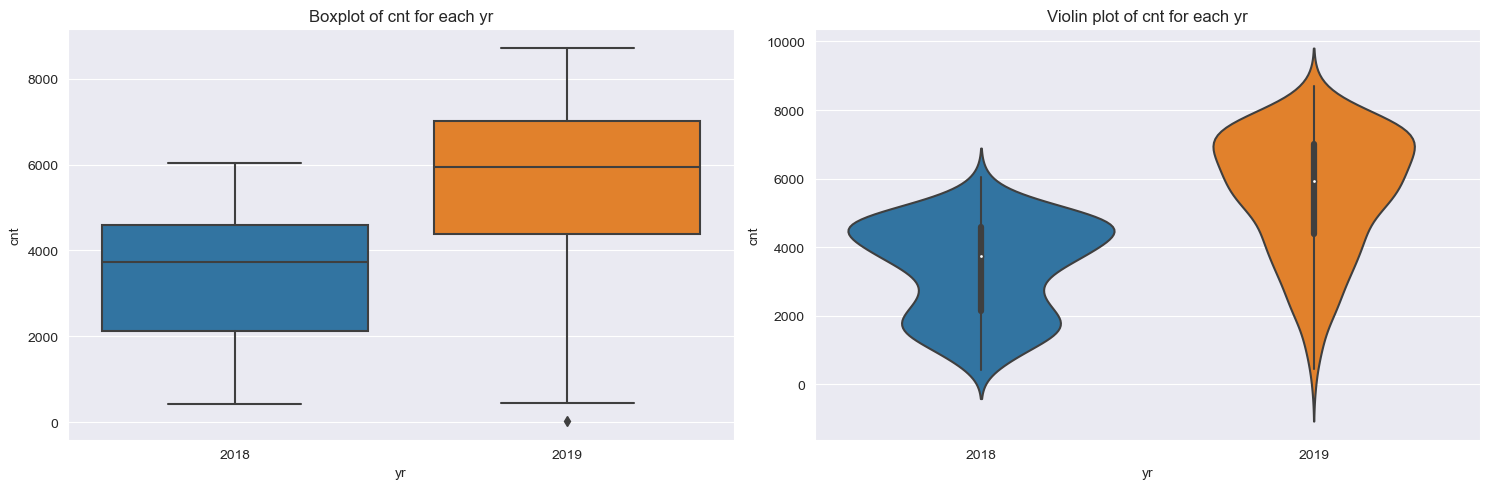

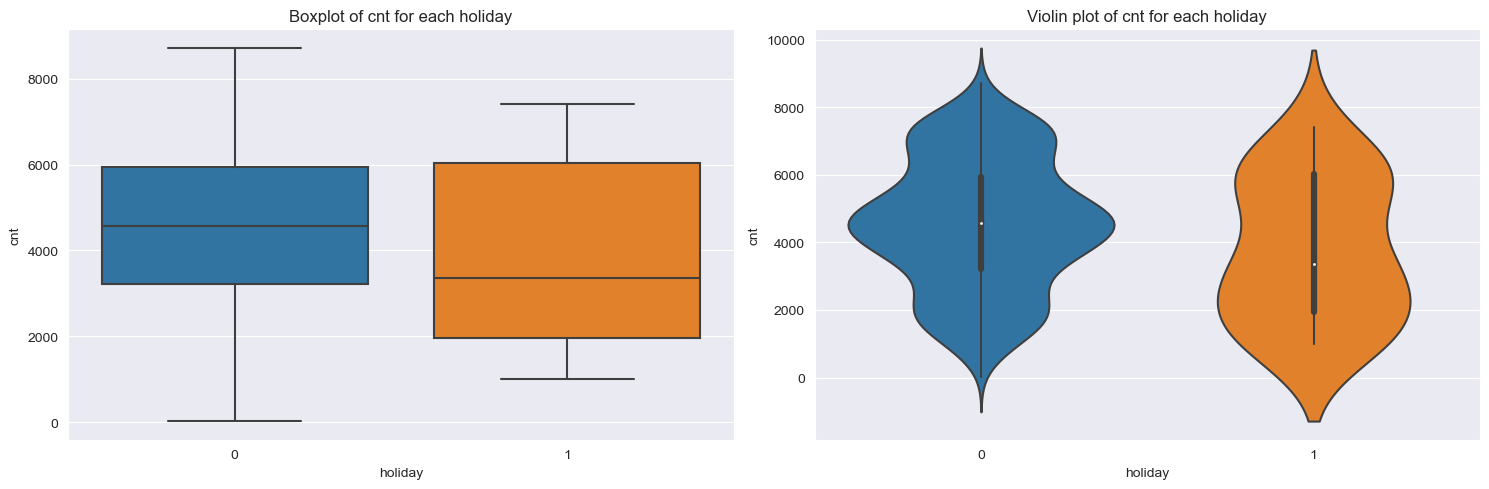

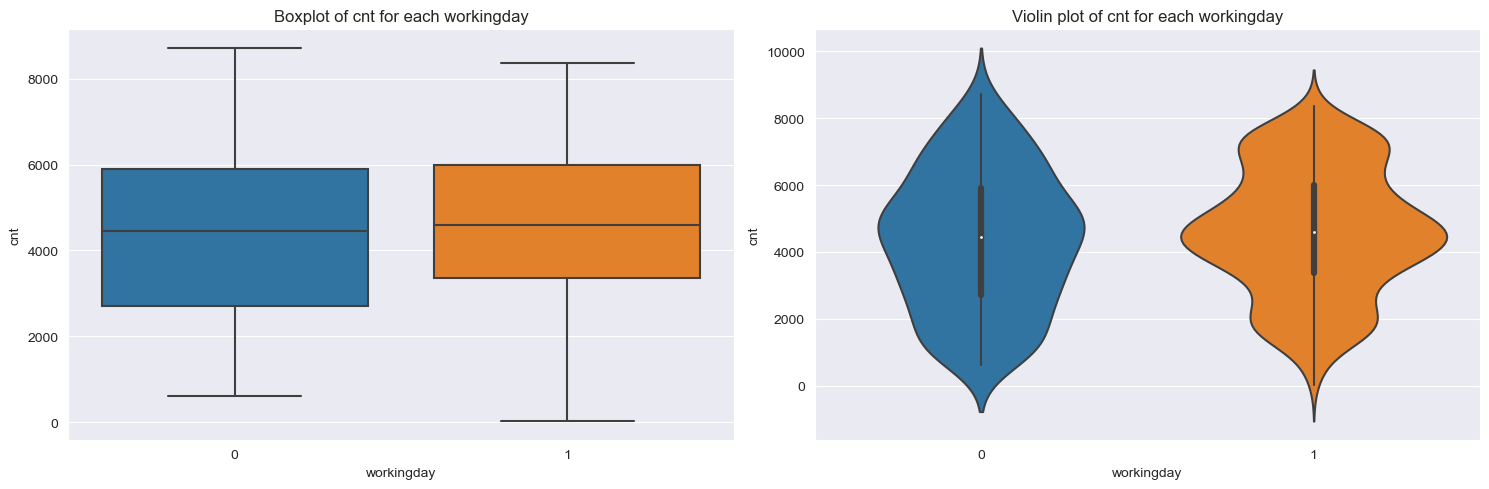

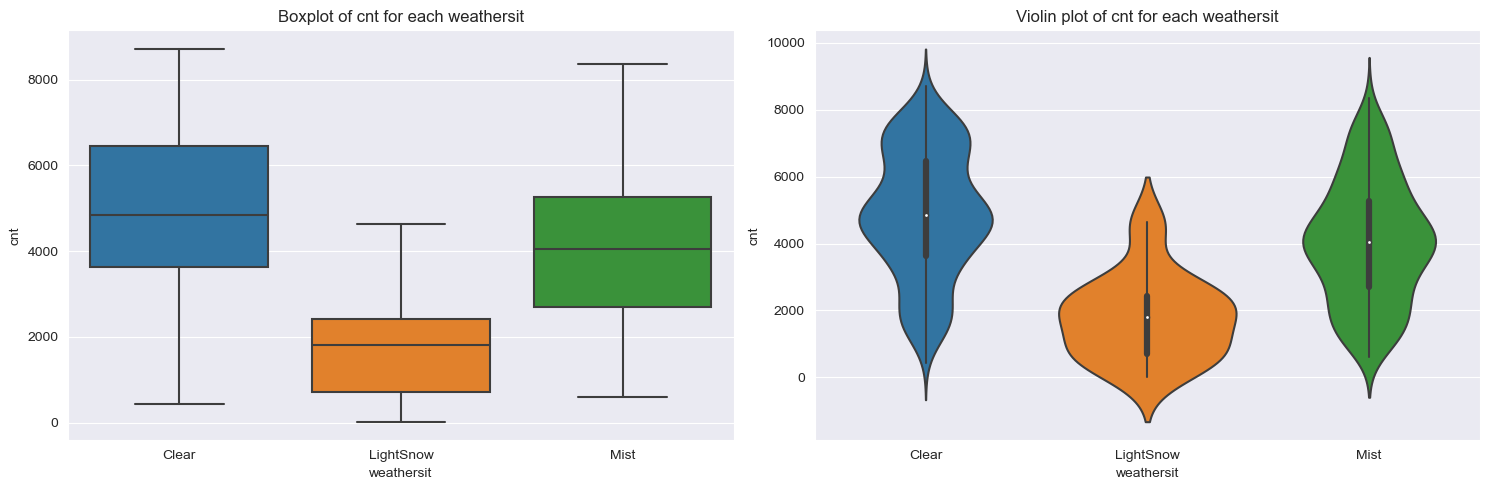

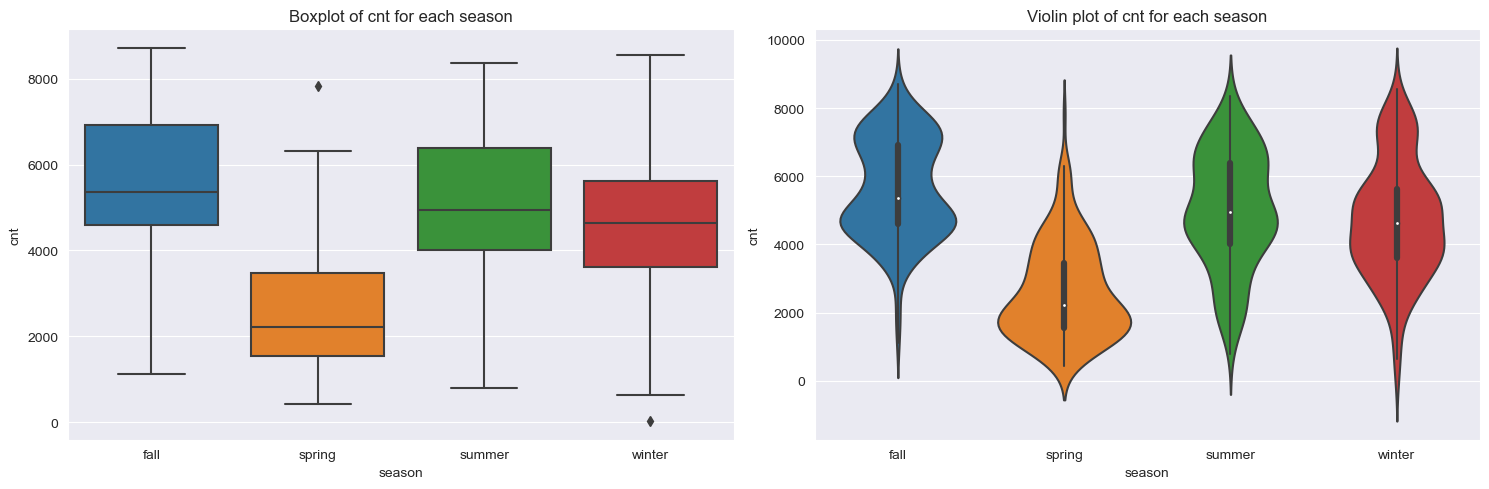

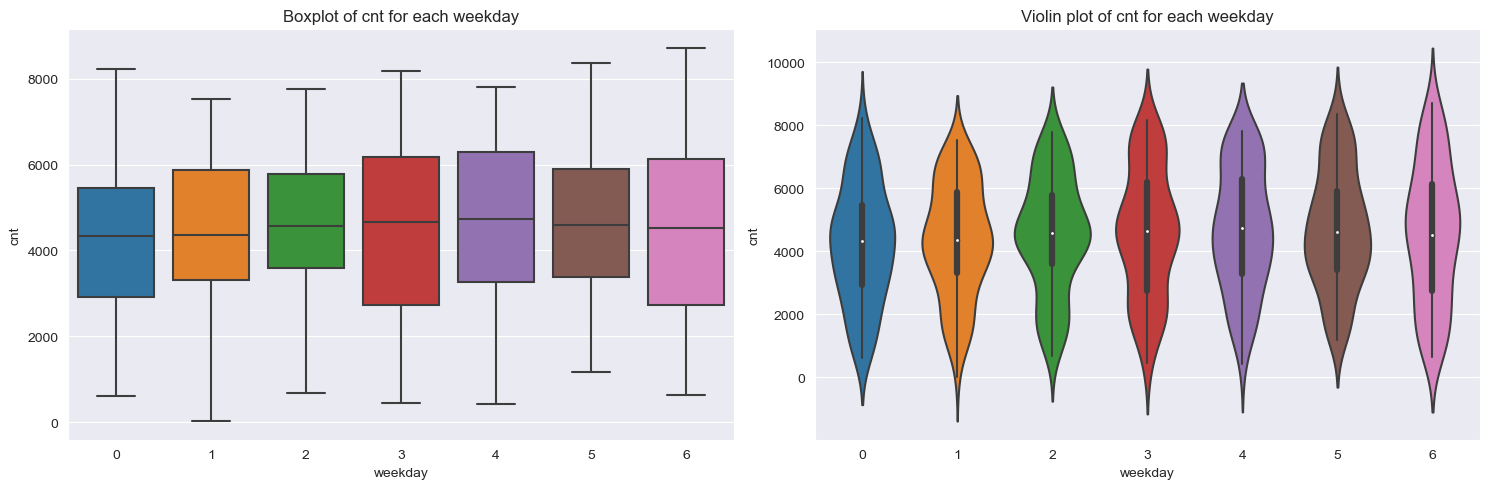

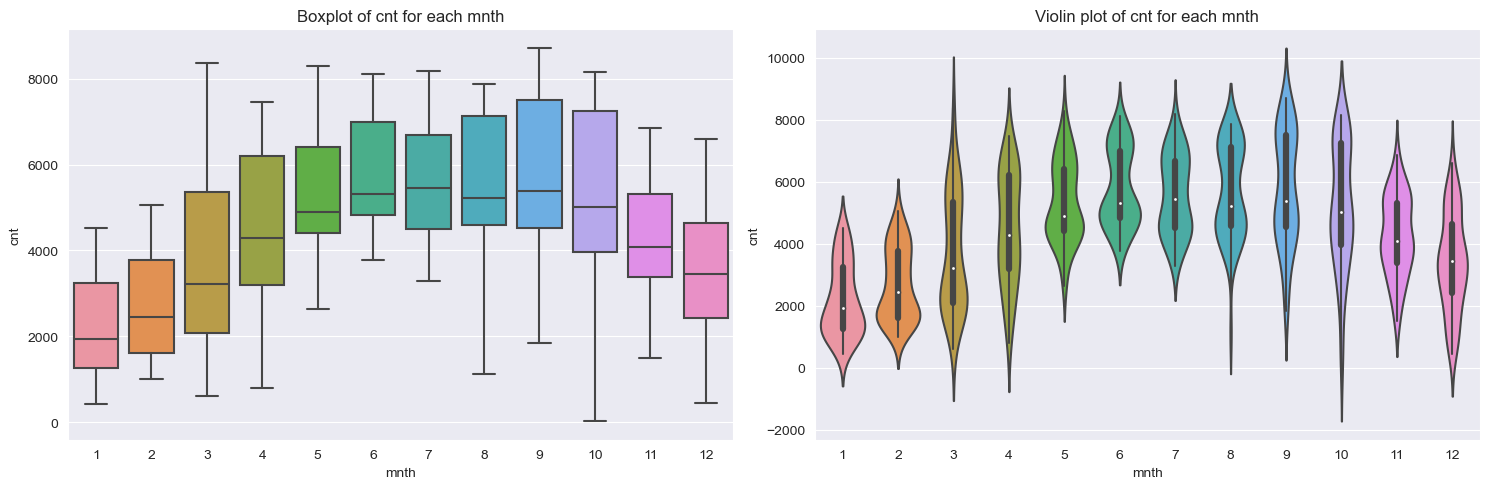

In [14]:
categorical_columns = ['yr', 'holiday', 'workingday', 'weathersit', 'season', 'weekday', 'mnth']

for col in categorical_columns:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Boxplot
    sns.boxplot(data=df, x=col, y='cnt', ax=axs[0])
    axs[0].title.set_text(f'Boxplot of cnt for each {col}')

    # Violin plot
    sns.violinplot(data=df, x=col, y='cnt', ax=axs[1])
    axs[1].title.set_text(f'Violin plot of cnt for each {col}')

    plt.tight_layout()
    plt.show()

#### Cnt vs Numeric Analysis

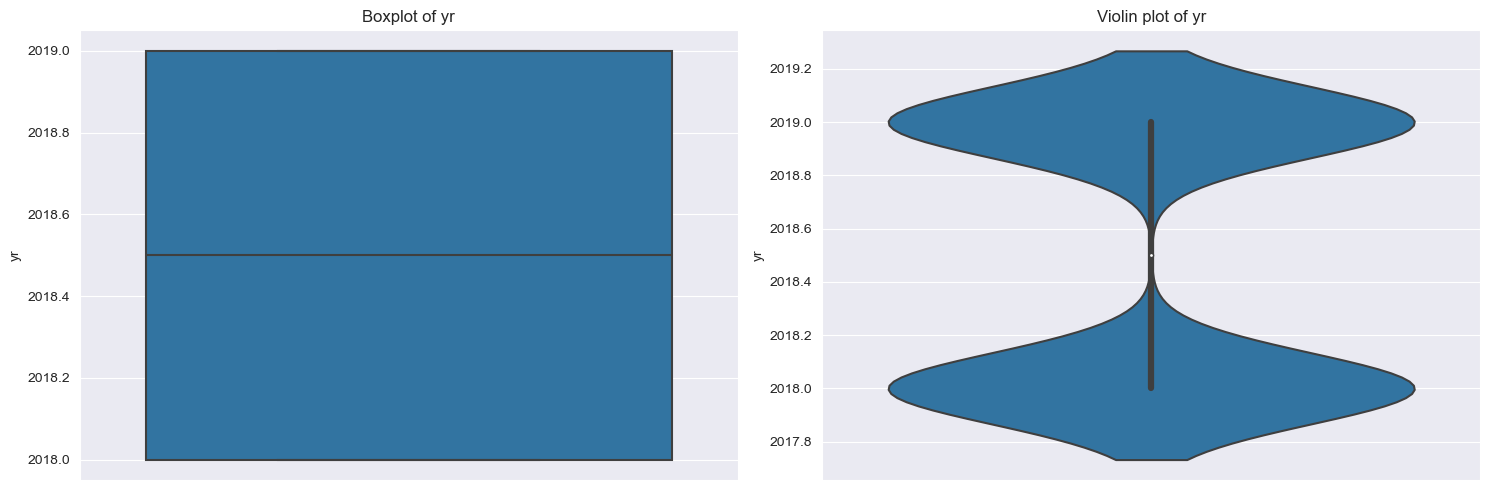

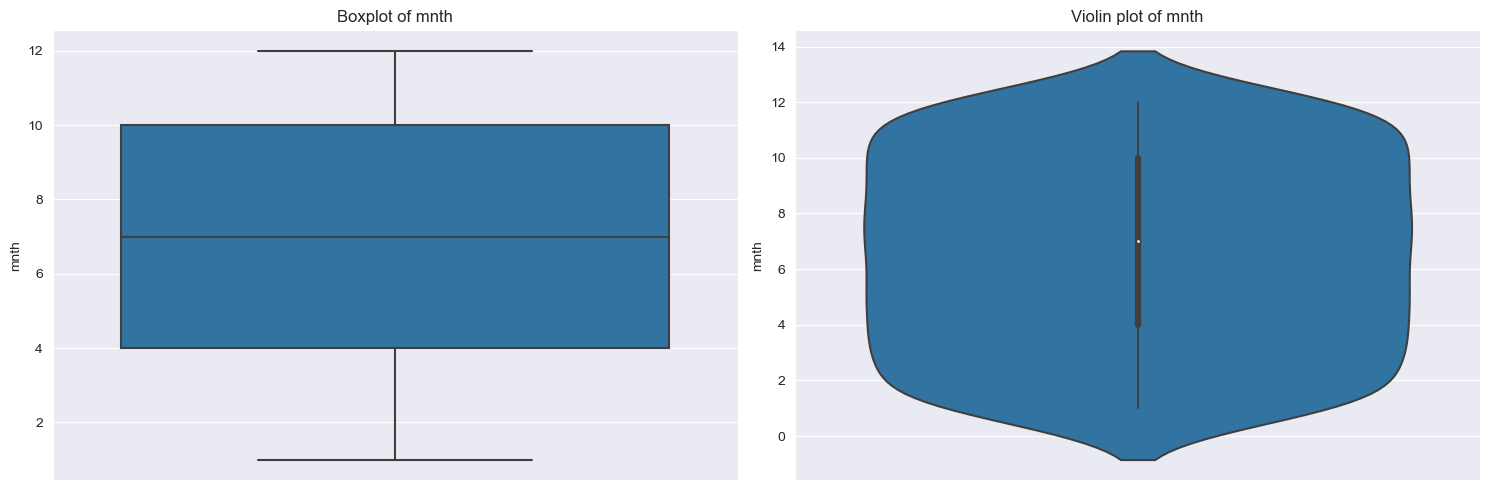

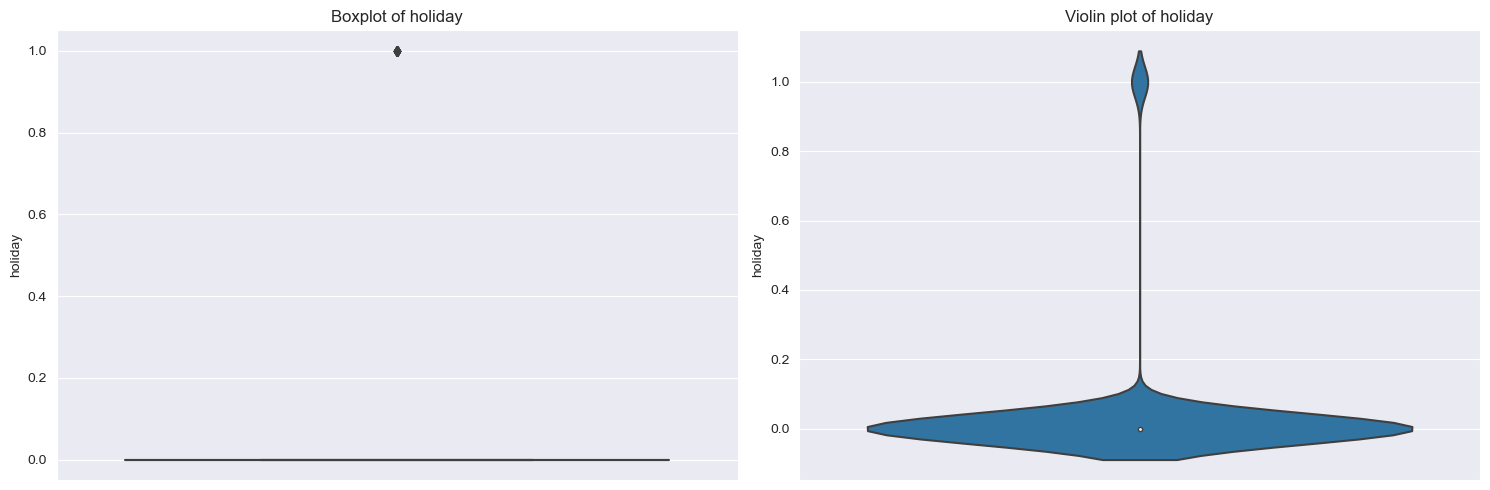

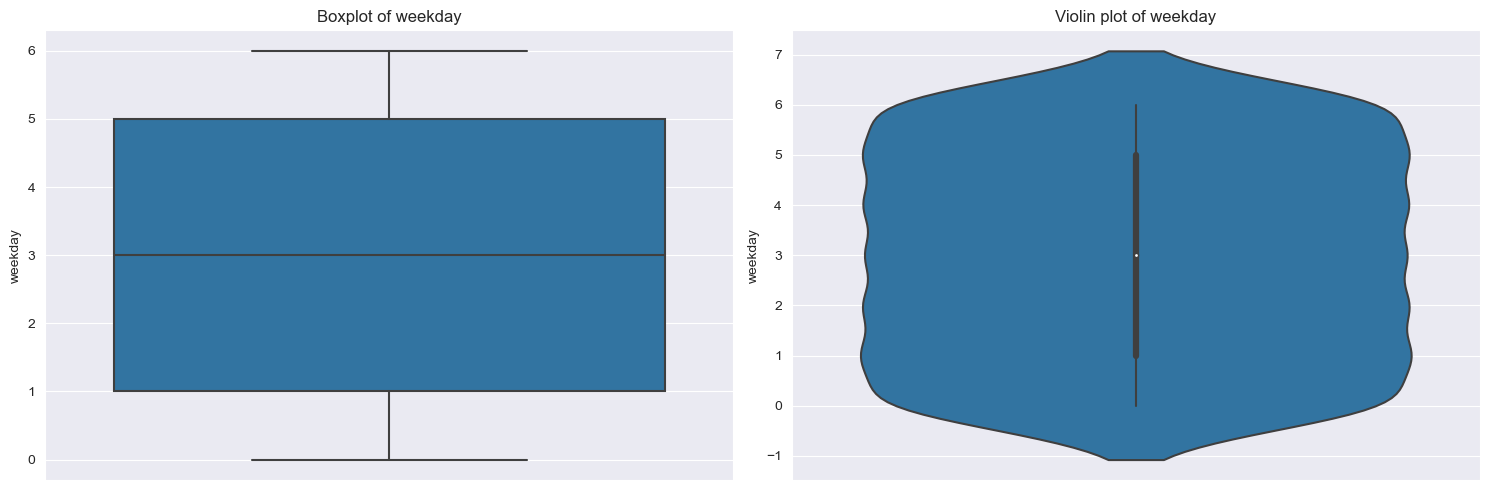

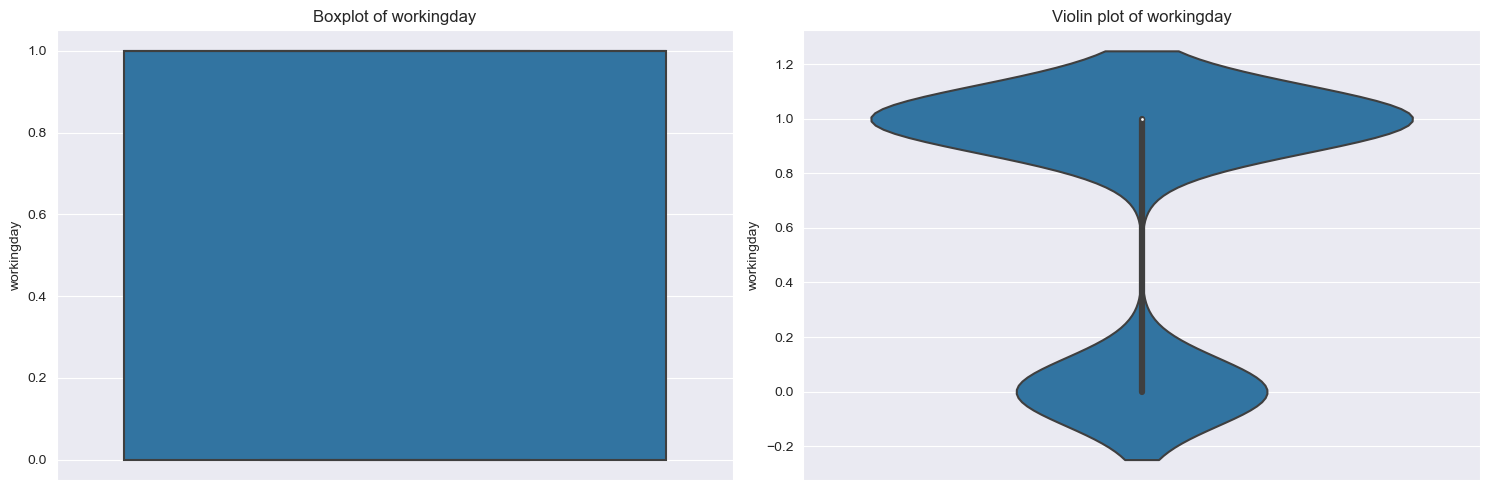

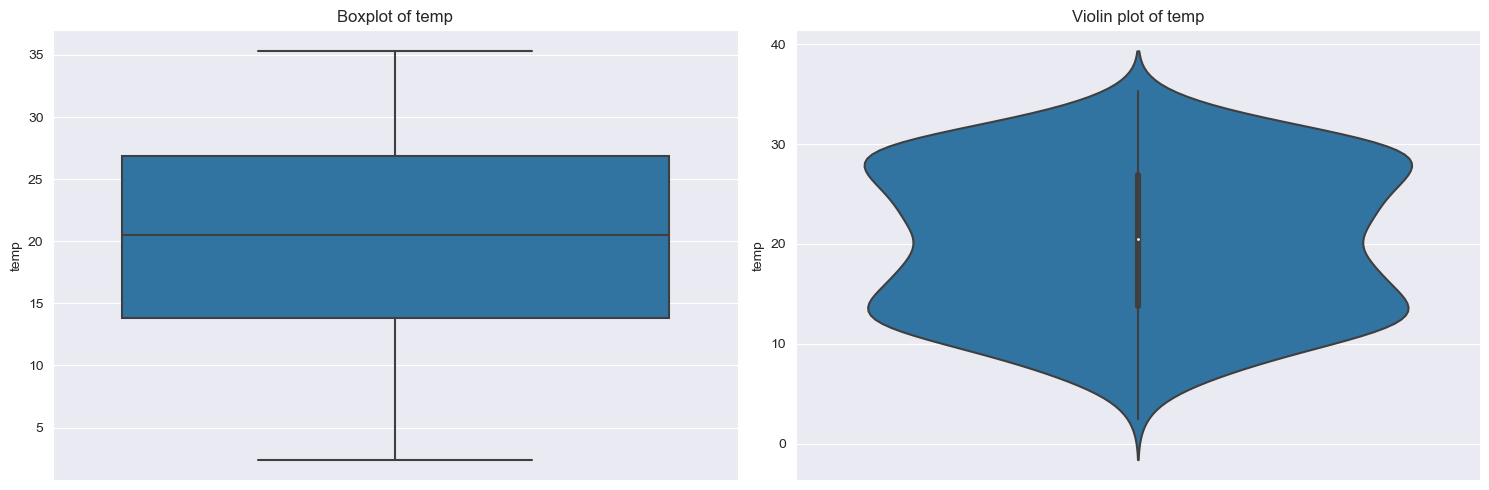

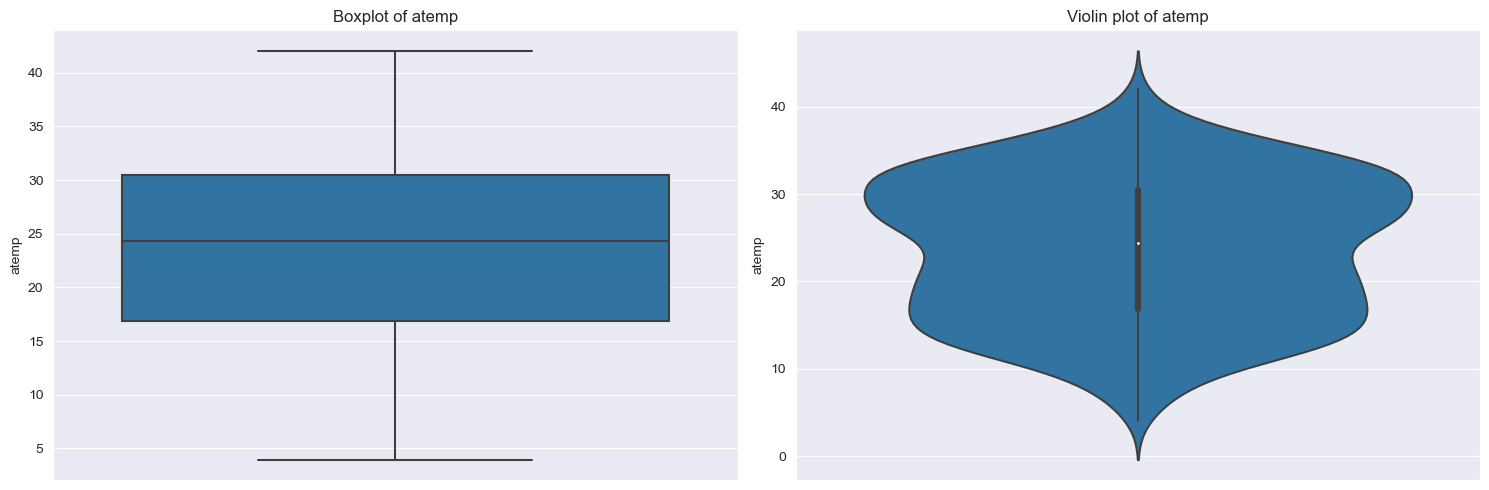

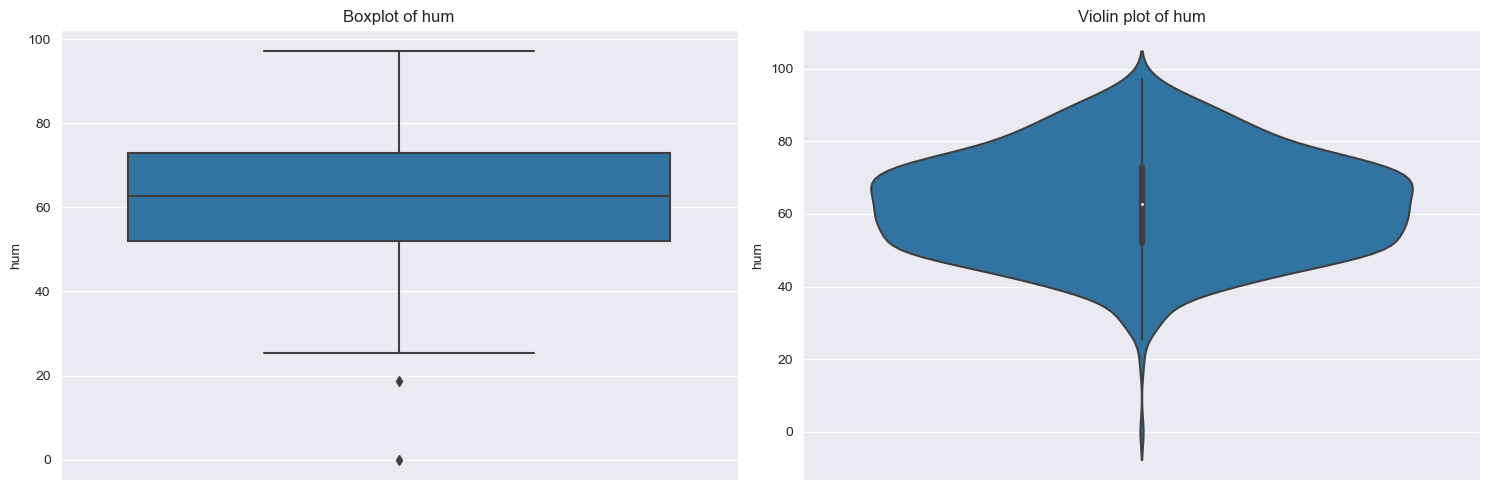

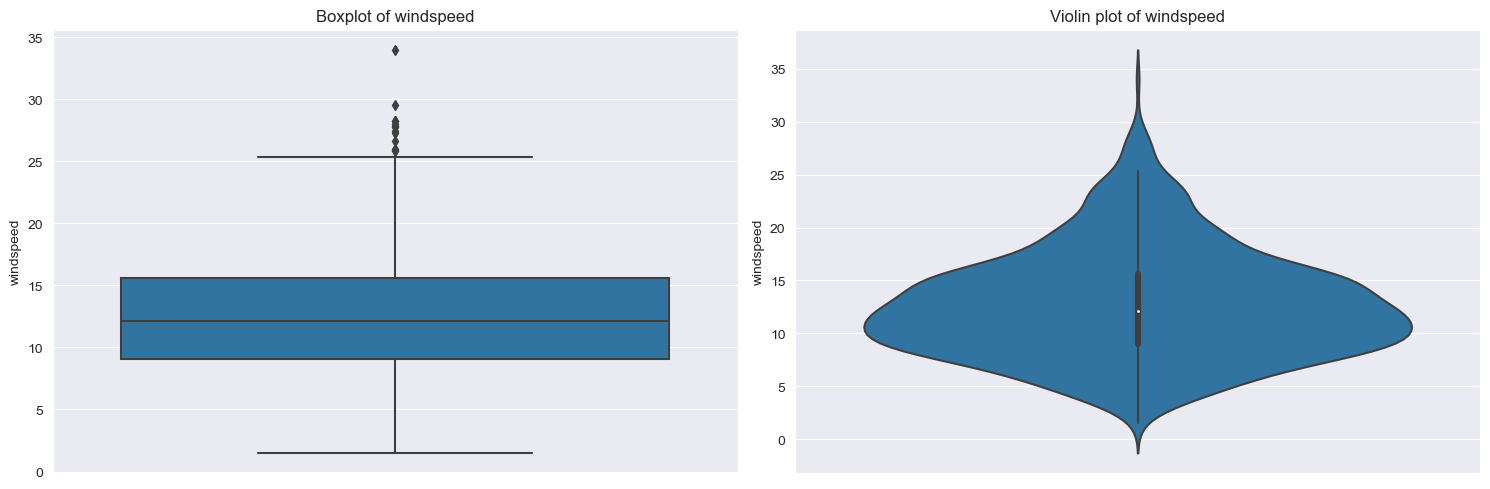

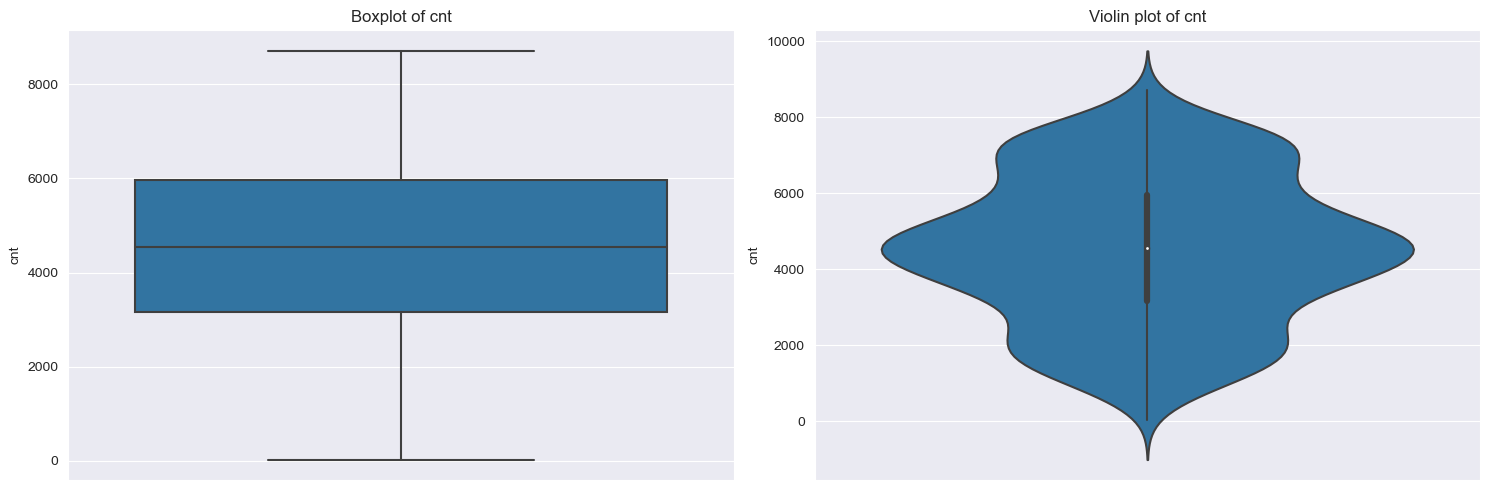

In [15]:
# analyse for numeric columns on distribution of the values with count
numerical_columns = df.select_dtypes(include='number')

for col in numerical_columns:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Boxplot
    sns.boxplot(data=df, y=col, ax=axs[0])
    axs[0].title.set_text(f'Boxplot of {col}')

    # Violin plot
    sns.violinplot(data=df, y=col, ax=axs[1])
    axs[1].title.set_text(f'Violin plot of {col}')

    plt.tight_layout()
    plt.show()


In [16]:
# create dummy variable for all categorical variables where no of categories > 2
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if df[col].nunique() > 2:  # check if the categorical variable has more than 2 categories
        dummy_cols = pd.get_dummies(df[col], prefix=col, drop_first=True).astype('int')
        df = pd.concat([df, dummy_cols], axis=1)
        df = df.drop(col, axis=1)  # drop the original categorical column
df

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,weathersit_Mist
0,2018-01-01,2018,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018-01-02,2018,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018-01-03,2018,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018-01-04,2018,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018-01-05,2018,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,2019,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,1
726,2019-12-28,2019,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,1
727,2019-12-29,2019,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,1
728,2019-12-30,2019,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0


In [17]:
df.describe()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,weathersit_Mist
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018-12-31 12:00:00,2018.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.028767,0.336986
min,2018-01-01 00:00:00,2018.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-07-02 06:00:00,2018.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018-12-31 12:00:00,2018.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019-07-01 18:00:00,2019.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2019-12-31 00:00:00,2019.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.167266,0.473004


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dteday                730 non-null    datetime64[ns]
 1   yr                    730 non-null    int64         
 2   mnth                  730 non-null    int64         
 3   holiday               730 non-null    int64         
 4   weekday               730 non-null    int64         
 5   workingday            730 non-null    int64         
 6   temp                  730 non-null    float64       
 7   atemp                 730 non-null    float64       
 8   hum                   730 non-null    float64       
 9   windspeed             730 non-null    float64       
 10  cnt                   730 non-null    int64         
 11  season_spring         730 non-null    int32         
 12  season_summer         730 non-null    int32         
 13  season_winter       

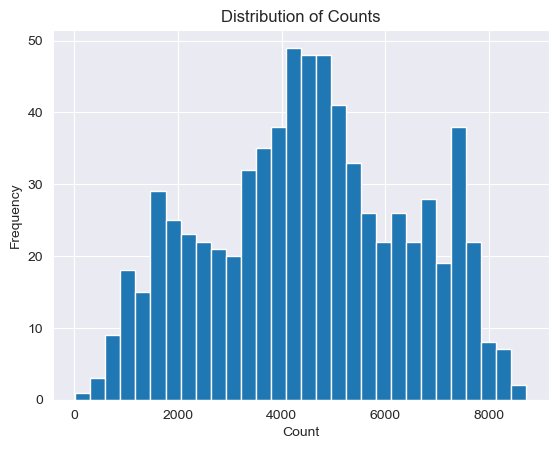

In [19]:
# Univariate analysis
# Histogram
df['cnt'].hist(bins=30)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Counts')
plt.show()

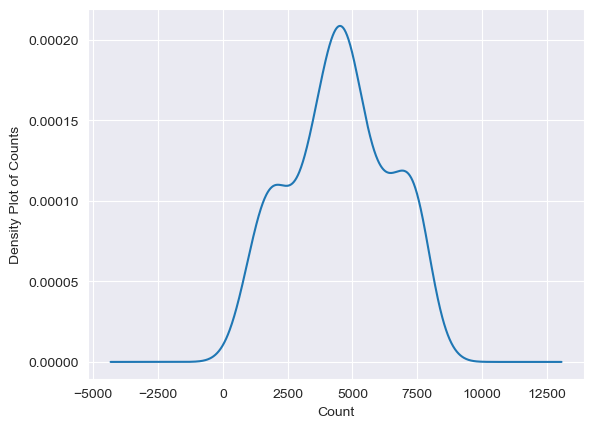

In [20]:
# Density Plot
df['cnt'].plot(kind='density')
plt.xlabel('Count')
plt.ylabel('Density Plot of Counts')
plt.show()

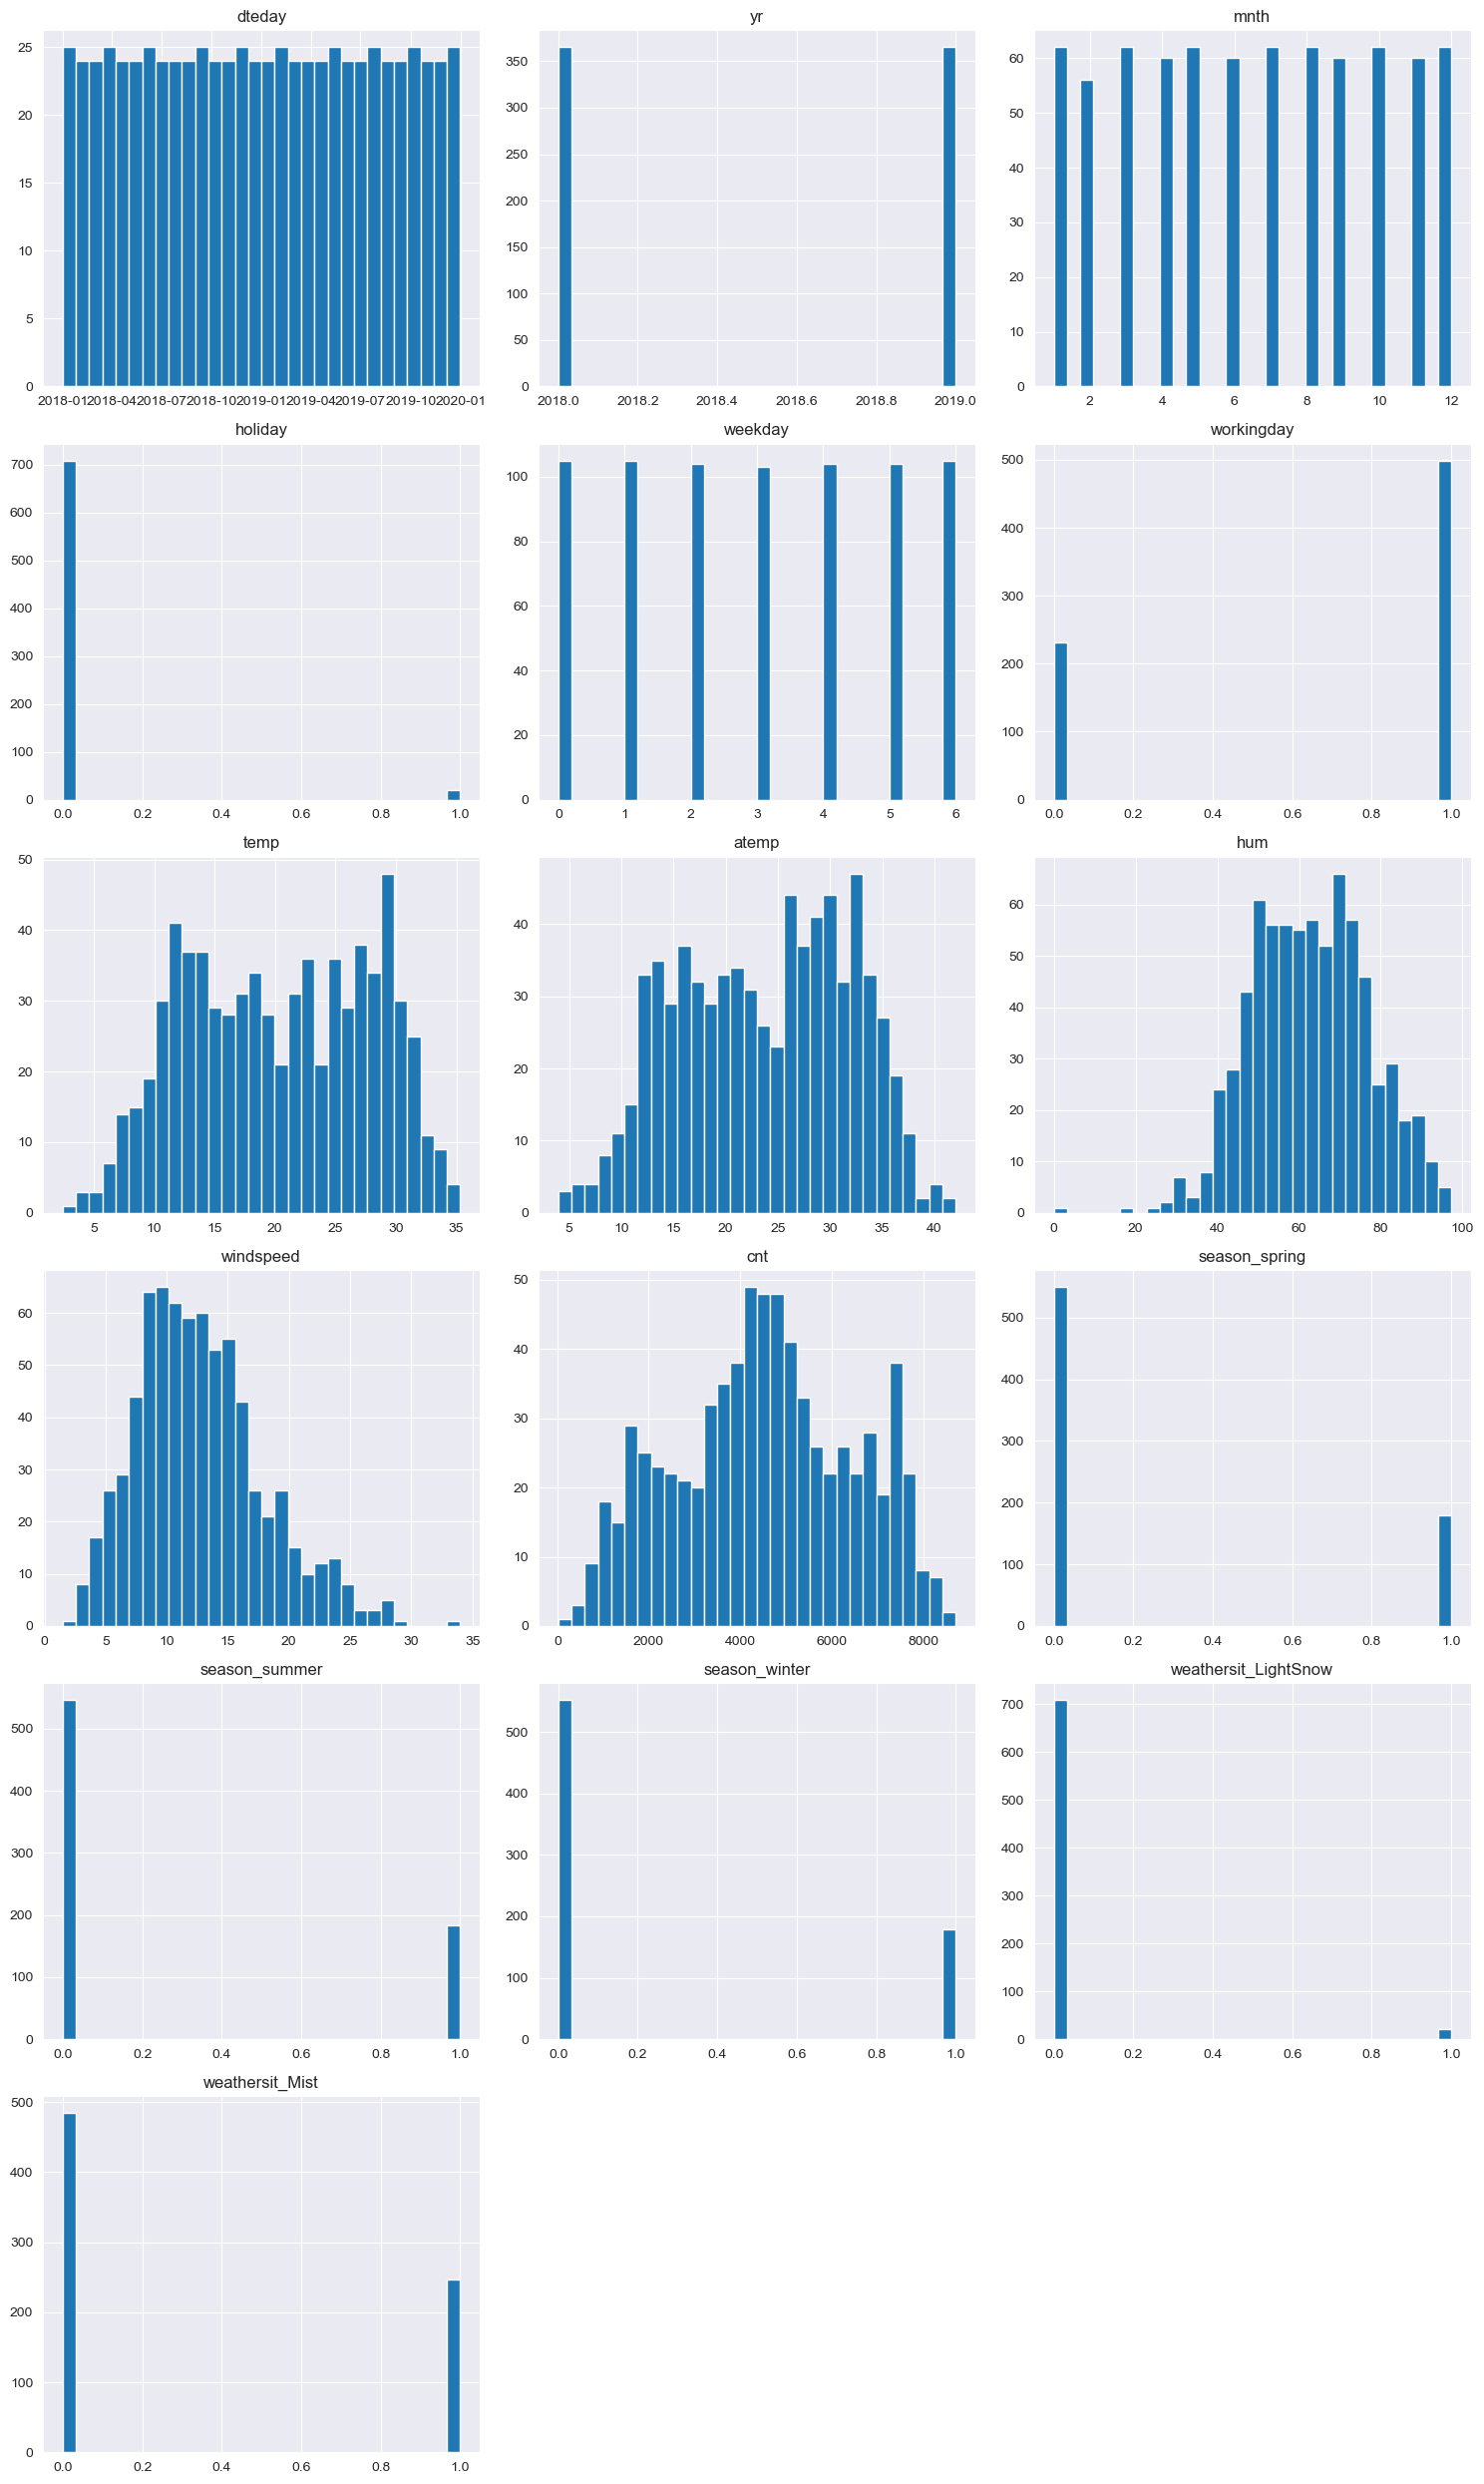

In [21]:
# Define the number of rows and columns for the subplots
n = len(df.columns)
ncols = 3
nrows = n // ncols
nrows += n % ncols

# Set up the figure & size
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 25))

# Iterate over each column and plot the histogram.
for i, column in enumerate(df.columns):
    r = i // ncols
    c = i % ncols
    ax = axs[r][c]
    df[column].hist(bins=30, ax=ax)
    ax.set_title(column)

# Hide unused subplots.
for i in range(n, nrows * ncols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()  # Improves appearance a bit.
plt.show()

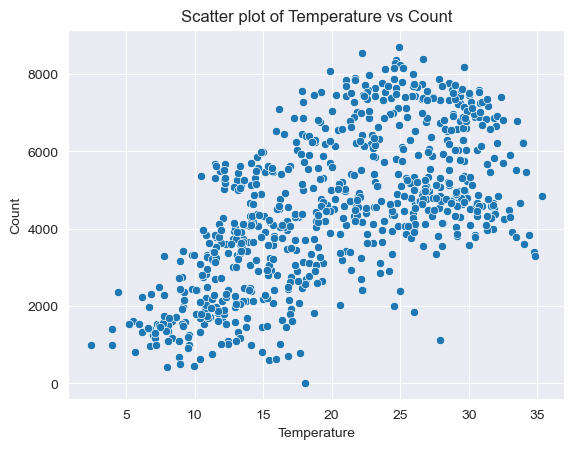

In [22]:
# Bivariate Analysis:
# Scatter plot
sns.scatterplot(x='temp', y='cnt', data=df)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter plot of Temperature vs Count')
plt.show()

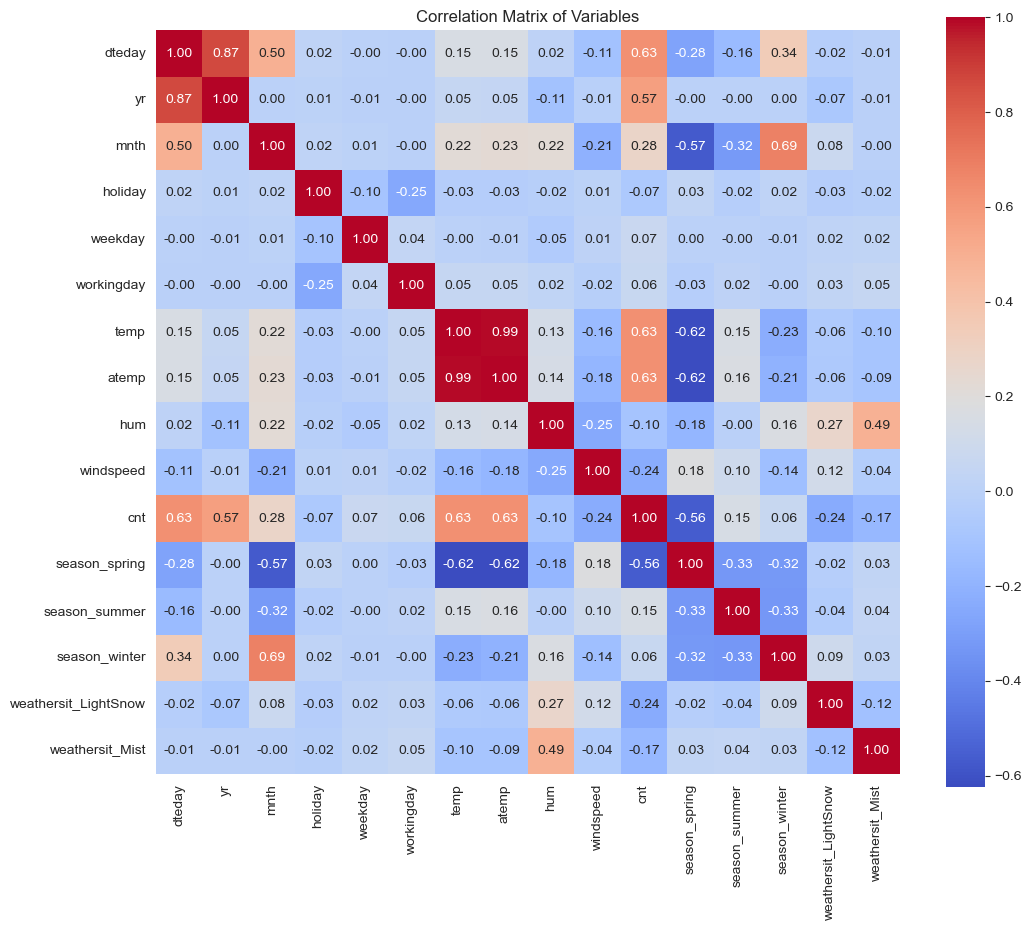

In [23]:
# Multivariate Analysis:
# Generating correlation matrix
corr = df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm',
            annot_kws={'size': 10}, fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

##### For Cnt:
* Increasing:
    * temp
    * atemp
    * year
    * mnt
    * dteday
    * summer season
* Decreasing:
    * Spring Season
    * windspeed
    * holiday

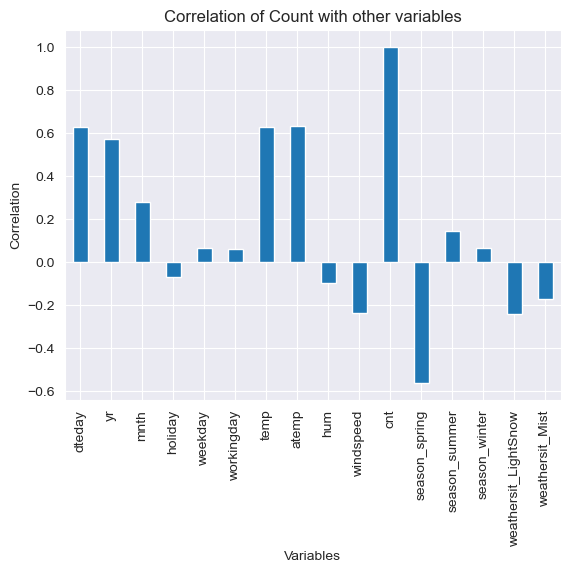

In [24]:
correlation = df.corr()
cnt_corr = correlation['cnt']
cnt_corr.plot(kind='bar')
plt.title('Correlation of Count with other variables')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

C:\work\anaconda3\envs\LinearRegression_Assignment\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


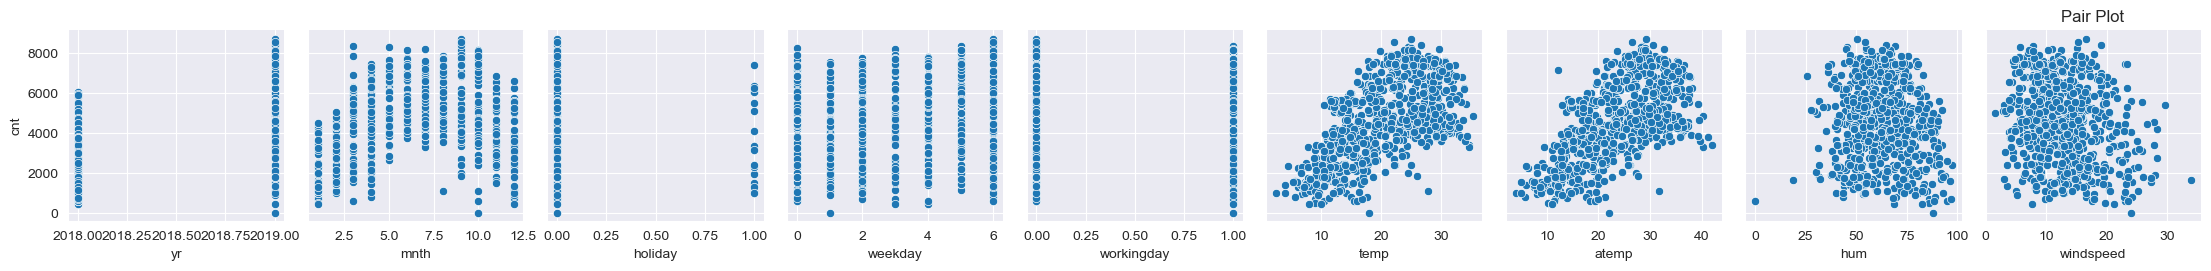

In [25]:
# pairplot
sns.pairplot(df[["yr",
                 "mnth",
                 "holiday",
                 "weekday",
                 "workingday",
                 "temp",
                 "atemp",
                 "hum",
                 "windspeed",
                 "cnt"]],
             y_vars="cnt",
             x_vars=["yr",
                     "mnth",
                     "holiday",
                     "weekday",
                     "workingday",
                     "temp",
                     "atemp",
                     "hum",
                     "windspeed"])
plt.title('Pair Plot')
plt.show()

#### Train and Test - Split Data :-

In [26]:
from sklearn.model_selection import train_test_split

df.drop(columns=['dteday'], inplace=True)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

#### Missing Value Imputation :-
* No Missing Data

In [27]:
df.isna().sum()

yr                      0
mnth                    0
holiday                 0
weekday                 0
workingday              0
temp                    0
atemp                   0
hum                     0
windspeed               0
cnt                     0
season_spring           0
season_summer           0
season_winter           0
weathersit_LightSnow    0
weathersit_Mist         0
dtype: int64

#### Scaling :-
* fit & transform (training data)
* transform (test data)

In [28]:
#### Scaling :-
# fit & transform (training data)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [29]:
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'yr']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,weathersit_Mist
653,1.0,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,0,0
576,1.0,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0
426,1.0,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,1
728,1.0,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,0
482,1.0,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,1


In [30]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

#### Feature Selection & Building Model :-
* Automated (RFE)
* Manual (p-value + VIF)
* one-by-one
* Hybrid (Automated + Manual)
```
* CutOff of p-value is 0.05 (p-value < 0.05)
* CutOff of VIF is 5 (VIF <= 5) 
```

##### Hybrid - Automated RFE

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'season_summer'], dtype='object')

##### Building model using statsmodel, for the detailed statistics

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# X_train_rfe=X_train_rfe.select_dtypes(include=np.number)
X_train_new = X_train_rfe

In [37]:
# Adding a constant variable
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)

In [38]:
lm = sm.OLS(y_train, X_train_new).fit()  # Running the linear model

In [39]:
#Let's see the summary of our linear model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1420.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                        0.00
Time:                        20:15:23   Log-Likelihood:                         -4194.2
No. Observations:                 510   AIC:                                      8408.
Df Residuals:                     500   BIC:                                      8451.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [40]:
# drop columns with highest P >= 0.05
X_train_new = X_train_new.drop(columns=['atemp'])

In [41]:
# rebuild model
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)  # Adding a constant variable
lm = sm.OLS(y_train, X_train_lm).fit()  # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.64e-182
Time:                        20:15:23   Log-Likelihood:                -4144.3
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     500   BIC:                             8351.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2961.4807 

In [42]:
lm.params

const                   2961.480664
yr                      2016.259029
holiday                 -767.590973
temp                    3847.660647
hum                    -1103.833321
windspeed              -1474.978604
season_spring          -1012.586912
season_winter            475.092706
weathersit_LightSnow   -2149.041253
weathersit_Mist         -479.565427
dtype: float64

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,59.43
3,temp,2.59
6,season_spring,2.52
4,hum,1.85
7,season_winter,1.77
9,weathersit_Mist,1.56
8,weathersit_LightSnow,1.23
5,windspeed,1.16
1,yr,1.03
2,holiday,1.01


In [44]:
# drop columns with highest VIF >= 5
X_train_new = X_train_new.drop(['hum'], axis=1)

In [45]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)  # Adding a constant variable
lm = sm.OLS(y_train, X_train_lm).fit()  # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.62e-181
Time:                        20:15:23   Log-Likelihood:                -4149.5
No. Observations:                 510   AIC:                             8317.
Df Residuals:                     501   BIC:                             8355.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2355.0459 

In [46]:
# drop columns with highest P >= 0.05
X_train_new = X_train_new.drop(['holiday'], axis=1)

In [47]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_new)  # Adding a constant variable
lm = sm.OLS(y_train, X_train_lm).fit()  # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     319.0
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.95e-180
Time:                        20:15:24   Log-Likelihood:                -4155.0
No. Observations:                 510   AIC:                             8326.
Df Residuals:                     502   BIC:                             8360.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2340.1816 

In [48]:
# X_train_lm = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,windspeed,3.91
1,temp,3.52
0,yr,2.05
3,season_spring,1.63
6,weathersit_Mist,1.49
4,season_winter,1.36
5,weathersit_LightSnow,1.08


1. Top 3 contributing features of the model

In [49]:
# getting the coefficients 
coeff = lm.params

# removing the intercept term if it exists
if 'const' in coeff.index:
    coeff = coeff.drop('const')

# sort by absolute value and get top 3
top3_features = coeff.abs().sort_values(ascending=False).head(3)

print(top3_features)

temp                    3665.936335
weathersit_LightSnow    2421.584763
yr                      2044.900393
dtype: float64


#### Validating Assumptions of Linear Regression

In [50]:
y_train_pred = lm.predict(X_train_lm)

In [51]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Residual plot')

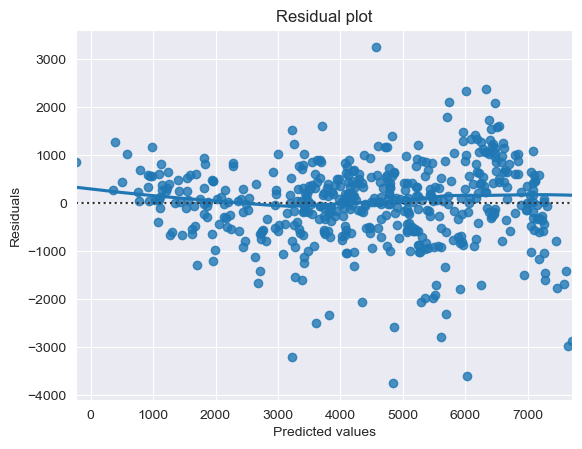

In [52]:
from statsmodels.stats.stattools import durbin_watson

# Calculating residuals
residuals = y_train - y_train_pred

# Plotting residuals to check assumption of linearity and homoscedasticity
sns.residplot(x=y_train_pred, y=residuals, lowess=True)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')

1. The scatter plot of residuals does not display any discernible pattern or correlation along the x-axis, suggesting that the observations are randomly distributed. Therefore, the assumption of linearity needed for linear regression appears to hold true.

2. The distribution of residuals across the predictor values is even, forming a rectangular shape rather than a funnel. This indicates that the residuals have a constant variance, fulfilling the condition of homoscedasticity instead of Heteroscedasticity. Thus, the assumption of homoscedasticity, crucial for linear regression, is also satisfied.

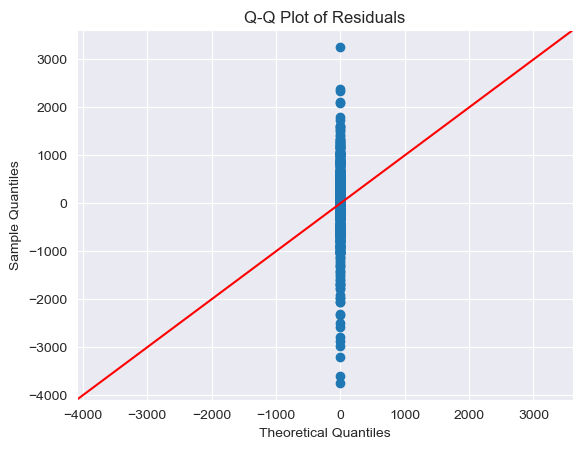

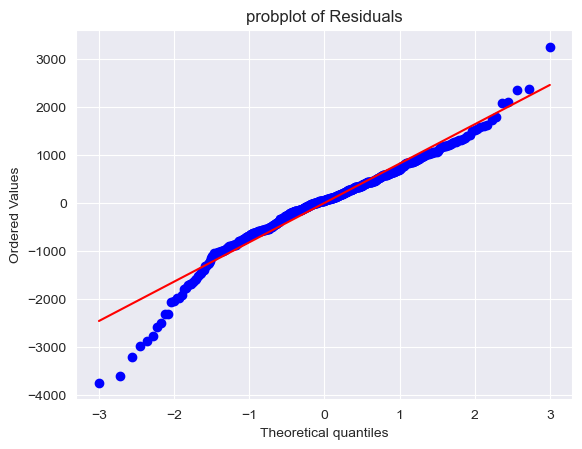

In [53]:
# Normality of errors
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('probplot of Residuals')
plt.show()

1. QQ Plot is not as expected as the dotted line is almost deviating from the line plotted 45 degress. so the data is either heavily skewed or have outliers or non-linear transformation to be considered.
2. Probplot is as expected with most of the dotted line between head and tail are on the line and follows the assumption of linear regression with residuals being normally distributed

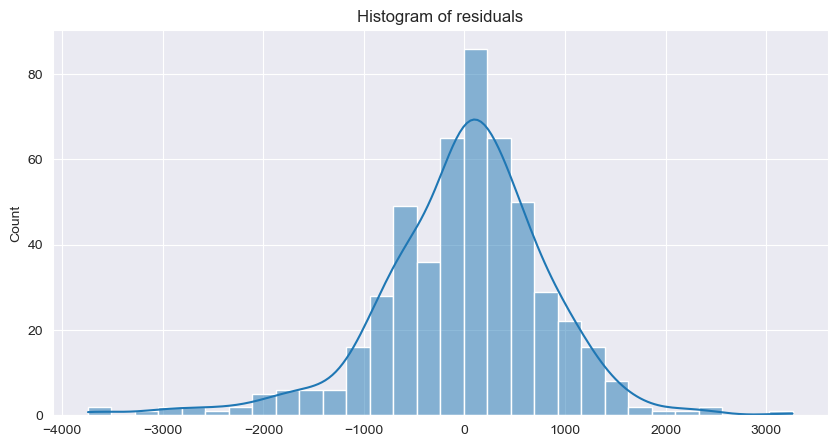

In [54]:
# Histogram for residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Histogram of residuals')
plt.show()

1. residuals for histplot mentions that residuals follows normally distributed in a bell curve

In [55]:
from scipy.stats import shapiro

# Shapiro-Wilk test
stat, p = shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.958, p=0.000
Sample does not look Gaussian (reject H0)


* Above p value is not greater than 0.05 and so it indicates sample data is normally distributed and so consideration of non-linear transformation or further outlier correction to be done
* However the histogram and qqplot indicates its normal & there are no outliers that we can see in initial violin plots for whole dataset too.So we will ignore this statiscal warning for now

In [56]:
# independence of errors by running Durbin-Watson test
print("Durbin_Watson Test value:", durbin_watson(residuals))

Durbin_Watson Test value: 1.9728283777141598


* Durbin_Watson value close to 2 suggests that there is no autocorrelation



#### 9. Evaluation (on Test Data)
* R2 (80-85% - for train and test both)
* Adjusted R2 (80-85% - for train and test both)
    

##### Making Predictions

* Applying the scaling on the test sets

In [57]:
df_test[num_vars] = scaler.transform(
    df_test[num_vars])

* Dividing into X_test and y_test

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

In [59]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [60]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

* Model Evaluation

Text(0, 0.5, 'y_test_pred')

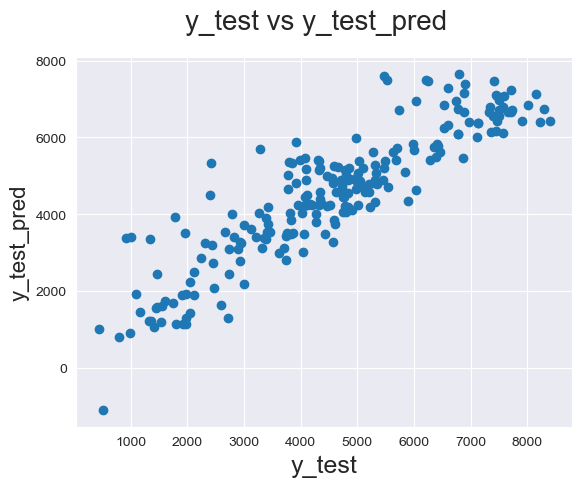

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)  # Plot heading 
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_test_pred', fontsize=16)  # Y-label

* its almost a linear increase, so it looks fine.

In [62]:
from sklearn.metrics import mean_squared_error

#RMSE
np.sqrt(mean_squared_error(y_test, y_test_pred))

851.6205913210406

* rmse is a low value - indicating the evaluation is fine 

In [63]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
print(f"R2 score for test: {r2_test}")

R2 score for test: 0.7978854446955657


* R2 value is high and equal to 0.80 after approximation to two digits - indication the evaluation is fine